In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,Input
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [3]:
##  Read train data
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = train_data["label"]
X = train_data.drop(labels=["label"],axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

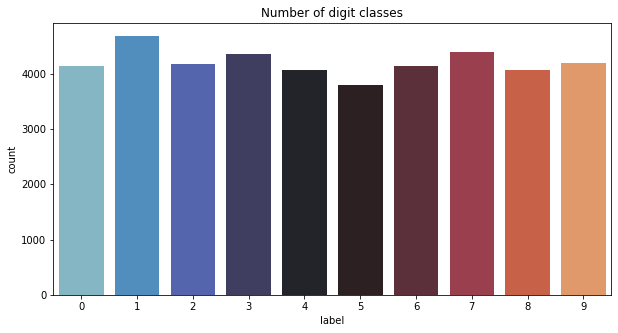

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(Y,palette="icefire")
plt.title("Number of digit classes")


Y.value_counts()

In [6]:
## Read test data
test_data = pd.read_csv("../input/digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# normalize the data
X = X/255.0
test_data = test_data/255.0
print("X_train shape: ",X.shape)
print("test shape: ",test_data.shape)

X_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Reshape
X = X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
print("X_train shape: ",X.shape)
print("test shape: ",test_data.shape)

X_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


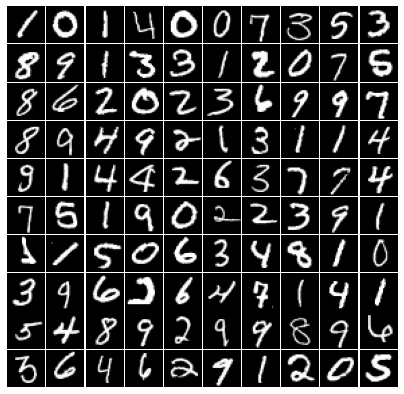

In [9]:
fig, ax_arr = plt.subplots(10, 10, figsize=(7, 7))
fig.subplots_adjust(wspace=.025, hspace=.025)

ax_arr = ax_arr.ravel()
for i, ax in enumerate(ax_arr):
    ax.imshow(X[i], cmap="gray")
    ax.axis("off")
    
plt.show()

In [10]:
X.shape

(42000, 28, 28, 1)

In [11]:
Y = Y.values
type(Y)

numpy.ndarray

In [12]:
inputs = Input(shape=(28,28,1))

x = Conv2D(filters=32, padding='same', activation='relu', kernel_size=(3,3))(inputs)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units=512, activation='relu')(x)
output = Dense(units=10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=output)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# from sklearn.model_selection import train_test_split
# X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=2)
# print("X_train shape :",X_train.shape)
# print("X_test shape :",X_val.shape)
# print("Y_train shape :",Y_train.shape)
# print("Y_test shape :",Y_val.shape)

In [16]:
history = model.fit(X, Y, epochs=15, validation_split=0.1)

Epoch 1/15
1182/1182 [==============================] - 7s 3ms/step - loss: 0.5591 - accuracy: 0.8097 - val_loss: 0.0665 - val_accuracy: 0.9788
Epoch 2/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0958 - accuracy: 0.9700 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 3/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0450 - val_accuracy: 0.9860
Epoch 4/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0543 - accuracy: 0.9817 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 5/15
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 6/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 7/15
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0278 - val_accuracy:

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


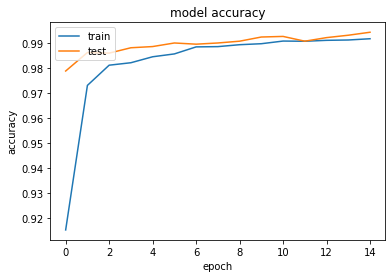

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

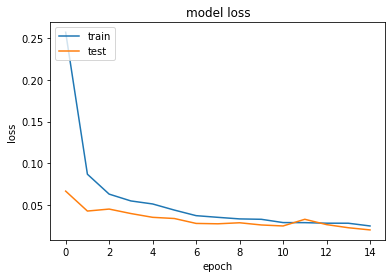

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
preds = model.predict(test_data)

preds_chosen = [np.argmax(row) for row in preds]
ids = range(1,len(preds_chosen)+1)

# Save outputs
output = pd.DataFrame({'ImageId': ids, 'Label': preds_chosen})
output.to_csv('submission.csv', index=False)

Prediction result for a score 2


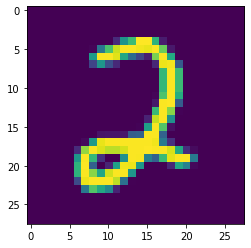

In [22]:
#check if your model predicted correctly or not
ind = 179
print("Prediction result for a score {}".format(preds_chosen[ind]))
plt.imshow(test_data[ind]) #model predicted correctly

In [23]:
## Confusion matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model.fit(X_train,y_train, epochs=6, validation_data=(X_test,y_test), batch_size=128, verbose=1)

from sklearn.metrics import confusion_matrix
import itertools

Epoch 1/6
296/296 [==============================] - 1s 5ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0048 - val_accuracy: 0.9986
Epoch 2/6
296/296 [==============================] - 1s 4ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 3/6
296/296 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0047 - val_accuracy: 0.9986
Epoch 4/6
296/296 [==============================] - 1s 4ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 5/6
296/296 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0044 - val_accuracy: 0.9983
Epoch 6/6
296/296 [==============================] - 1s 5ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0056 - val_accuracy: 0.9983


In [24]:
## This function plots the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

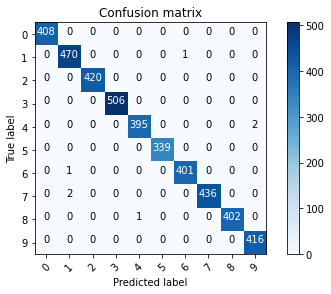

In [27]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [28]:
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_test != 0)

Y_pred_classes_errors = y_pred_classes[errors]
Y_pred_errors = y_pred[errors]
Y_true_errors = y_test[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

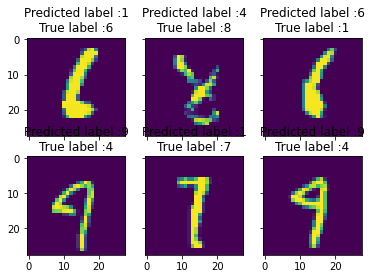

In [29]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)